# Import Libaries

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
global cnt 

# Read Image

In [8]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/tiger.png"
    img = plt.imread(path)
    grayscal = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    return img, grayscal

# Opencv Neighborhood Processing

In [29]:
def neighborhood_opencv(img,kernel):
    image = cv.filter2D(grayscal,-1,kernel,cv.BORDER_ISOLATED)
    return image

# Each pixel processing

In [30]:
def multi(img,kernel):
    kernel = kernel.flatten()
    x = 0.0
    for i in range(0,9):
        x += img[i]*kernel[i] 
    x = x/9.0
    x = min(255,x)
    x = max(0,x)
    #v = (x - 0)/(255 - 0) * 255.0
    return x

# Manual Neighborhood Processing

In [31]:
def neighborhood_manual(img,kernel): 
    r,w = img.shape
    temp = np.copy(img)

    for i in range(1,r-1):
        for j in range(1,w-1):
            rep = []
            for k in range (-1,2):
                for l in range(-1,2):
                    rep.append(img[i+k][j+l])
            temp[i][j] = multi(rep,kernel)    
    return temp

# Neighborhood Processing Compare

In [32]:
def compare(A,B):
    print(B.shape)
    height,width = B.shape
    errorL2 = cv.norm( A, B, cv.NORM_L2 )
    similarity = 1 - errorL2 / ( height * width )
    print('Similarity = ',similarity)


# Kernel Build

In [39]:
def kernel_build():
    kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    kernel2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    kernel3 = np.array([[2, 1, 0], [1, 0, -1], [0, 1, -2]])
    kernel4 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    kernel5 = np.array([[1, 2 , 1], [0, 0 , 0], [-1, -2 , -1]])
    kernel6 = np.array([[-1, -1, 2], [-1, 2, -1], [-1, -1, 2]])
    kernel = [kernel1,kernel2,kernel3,kernel4,kernel5,kernel6]
    return kernel2

In [40]:
def hisogram_opencv(img,img1):
    histr = cv.calcHist([img],[0],None,[256],[0,256])
    histr1 = cv.calcHist([img1],[0],None,[256],[0,256])
    plt.plot(histr)
    plt.plot(histr1)
    plt.title("Histogram")
    plt.show()
    

# Main

Image Shape and Size (422, 655) 276410
(422, 655)
Similarity =  0.9974561707018259


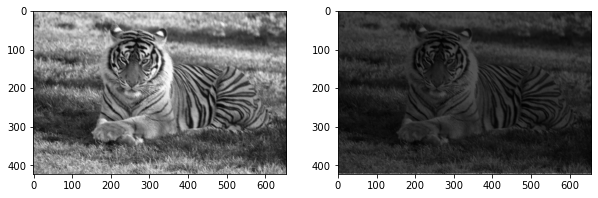

In [41]:
if __name__ == "__main__":
    img, grayscal = read_image()
    print("Image Shape and Size",grayscal.shape, grayscal.size)
    kernel = kernel_build()
    img_manual = neighborhood_manual(grayscal,kernel)
    img_opencv = neighborhood_opencv(grayscal,kernel)
    compare(img_manual,img_opencv)

    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.imshow(img_opencv,cmap = 'gray')
    plt.subplot(1,2,2)
    plt.imshow(img_manual,cmap = 'gray')
    plt.show()

    